In [1]:
import numpy as np
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt
import glob
import SimpleITK as sitk

import os
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

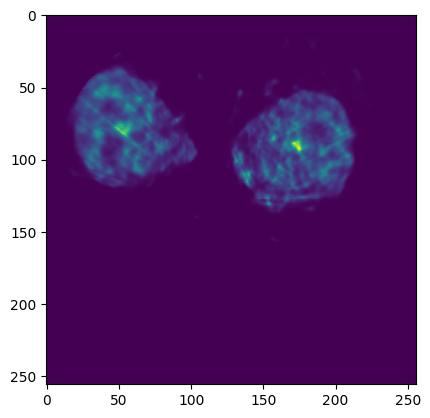

In [2]:
# specify your image path
pat1_CT = r'F:\U-CAN-Lymfom_A\Raw_DCM_transf_date_20221205__06__n86_90GB\ASPTCTX0001_npr134758508773-20191212\CT-20191212-112330-3.7-WB_FDG-CT-VENFAS-WB-Venfas-3-ax-3.000000mm_JK_'

pat1_PET = r'F:\U-CAN-Lymfom_A\Raw_DCM_transf_date_20221205__06__n86_90GB\ASPTCTX0001_npr134758508773-20191212\PT-20191212-110507-3.7-WB_FDG-CT-VENFAS-QCFX-S-400-2.7900mm_JK_'

pat2_CT = r'F:\U-CAN-Lymfom_A\Raw_DCM_transf_date_20221205__06__n86_90GB\ASPTCTX0001_npr190483255078-20210203\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_'

pat2_PET = r'F:\U-CAN-Lymfom_A\Raw_DCM_transf_date_20221205__06__n86_90GB\ASPTCTX0001_npr190483255078-20210203\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_'

resample_out = r'F:\U-CAN-Lymfom_A\Ashish_SampleResampling'

ds1 = dicom.dcmread(pat1_CT+ r'\1.2.840.113619.2.5.42235195.12863.1576135318.405')

ds2 = dicom.dcmread(pat1_PET+ r'\1.2.840.113619.2.405.3842664208.1576145387.94383')

ds3 = dicom.dcmread(pat2_PET+ r'\1.2.840.113619.2.405.3842663696.1612344628.347570')

plt.imshow(ds2.pixel_array)#, cmap=plt.cm.gray)



In [3]:
ds1.pixel_array.shape

(512, 512)

In [4]:
ds1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 180
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.5.42235195.12863.1576135318.405
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO 2022 IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']
(0008, 0012) Instance Creation Date              DA: '20191212'
(0008, 0013) Instance Creation Time              TM: '112330'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SO

In [5]:
ds1.PatientAge
ds1.Manufacturer
ds1.ManufacturerModelName

'Discovery MI'

In [6]:
ds1.fix_meta_info

<bound method Dataset.fix_meta_info of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 180
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.5.42235195.12863.1576135318.405
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO 2022 IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']
(0008, 0012) Instance Creation Date              DA: '20191212'
(0008, 0013) Instance Creation Time              TM: '112330'
(0008, 0016) SOP Class UID                    

In [7]:
ds2.fix_meta_info

<bound method Dataset.fix_meta_info of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 182
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Positron Emission Tomography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.405.3842664208.1576145387.94383
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO 2022 IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20191212'
(0008, 0013) Instance Creation Time              TM: '110947'
(0008, 0014) Instance Creator UID              

In [8]:
ds3.fix_meta_info

<bound method Dataset.fix_meta_info of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Positron Emission Tomography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.405.3842663696.1612344628.347570
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO 2022 IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20210203'
(0008, 0013) Instance Creation Time              TM: '103028'
(0008, 0014) Instance Creator UID             

In [9]:
meta_info = str(ds2.fix_meta_info)
meta_info_lst = meta_info.split('\n')
meta_info_lst

['<bound method Dataset.fix_meta_info of Dataset.file_meta -------------------------------',
 '(0002, 0000) File Meta Information Group Length  UL: 182',
 "(0002, 0001) File Meta Information Version       OB: b'\\x00\\x01'",
 '(0002, 0002) Media Storage SOP Class UID         UI: Positron Emission Tomography Image Storage',
 '(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.405.3842664208.1576145387.94383',
 '(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian',
 '(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1',
 "(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'",
 '-------------------------------------------------',
 "(0008, 0005) Specific Character Set              CS: 'ISO 2022 IR 100'",
 "(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']",
 "(0008, 0012) Instance Creation Date              DA: '20191212'",
 "(0008, 0013) Instance Creation Time              TM: '110

In [10]:
"(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']",
 "(0008, 0022) Acquisition Date                    DA: '20191212'",
 "(0008, 0060) Modality                            CS: 'PT'",
 "(0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'",
 "(0008, 1030) Study Description                   LO: 'PET FDG WB 1 h'",
 "(0008, 103e) Series Description                  LO: 'QCFX-S 400'",
 "(0008, 1090) Manufacturer's Model Name           LO: 'Discovery MI'",
 "(0018, 0050) Slice Thickness                     DS: '2.79'",
 "(0018, 1030) Protocol Name                       LO: '3.7 WB_FDG CT VENFAS'",
'(0020, 0032) Image Position (Patient)            DS: [-249.02343750000, -249.02343750000, -1085.7600097656]',
'(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, -0]',
 '(0020, 0052) Frame of Reference UID              UI: 1.2.840.113619.2.405.3.3842664208.103.1576074304.305.5240.1',
'(0028, 0010) Rows                                US: 256',
 '(0028, 0011) Columns                             US: 256',
 '(0028, 0030) Pixel Spacing                       DS: [1.953125, 1.953125]',
 "(0028, 0051) Corrected Image                     CS: ['DECY', 'ATTN', 'SCAT', 'DTIM', 'RANSNG', 'DCAL', 'SLSENS', 'NORM']",
 '(07a1, 1002) [number of images in series]        UL: 395',
#ds.PatientAge
#ds.Manufacturer
#ds.ManufacturerModelName
#weight
#size
#ac
#sex
#spacing
#patientID
#Image Position (Patient) 
#Image Orientation (Patient)
#Frame of Reference UID 
"""
(0010, 0020) Patient ID                          LO: 'ASPTCTX0001_npr134758508773'",
 "(0010, 0040) Patient's Sex                       CS: 'O'",
 "(0010, 1010) Patient's Age                       AS: '074Y'",
 "(0010, 1020) Patient's Size                      DS: '1.64'",
 "(0010, 1030) Patient's Weight                    DS: '72.0'",
 """
for element in meta_info_lst:

    if element.startswith('(0054, 1101)'): #Attenuation Correction Method 
        print(element) 
    if element.startswith('(0054, 1103)'): #Reconstruction Method
        print(element) 
    if element.startswith('(0008, 103e)'): #Series Description 
        print(element) 
    



IndentationError: unexpected indent (3814889193.py, line 2)

In [56]:
print(ds.ImageOrientationPatient)
print(ds.ImagePositionPatient)
print(ds.PixelSpacing)
print(ds.SliceThickness)
print(ds.FrameOfReferenceUID)


NameError: name 'ds' is not defined

In [57]:

reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(pat1_CT)
reader.SetFileNames(dicom_names)
pat1_CT_img = reader.Execute()

# Added a call to PermuteAxes to change the axes of the data
#image = sitk.PermuteAxes(image, [2, 1, 0])

sitk.WriteImage(pat1_CT_img, resample_out + '\pat1_CT_3Dimg.nii.gz')


In [13]:
reader2 = sitk.ImageSeriesReader()
dicom_names2 = reader2.GetGDCMSeriesFileNames(pat1_PET)
reader2.SetFileNames(dicom_names2)
pat1_PET_img = reader2.Execute()

# Added a call to PermuteAxes to change the axes of the data
#image2 = sitk.PermuteAxes(image2, [2, 1, 0])

sitk.WriteImage(pat1_PET_img, resample_out + '\pat1_PET_3Dimg.nii.gz')
sitk.WriteImage(pat1_PET_img, resample_out + '\pat1_PET_3Dimg_withcompression.nii.gz',useCompression=True)
sitk.WriteImage(pat1_PET_img, resample_out + '\pat1_PET_3Dimg.nrrd')
sitk.WriteImage(pat1_PET_img, resample_out + '\pat1_PET_3Dimg_withcompression.nrrd',useCompression=True)

In [62]:
#dicom_names2[:10]
pat1_CT_img.Get

('ITK_non_uniform_sampling_deviation',)

In [28]:
selected_image = pat1_CT_img
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

#selected_image.SetOrigin((78.0, 76.0, 77.0))
selected_image.SetSpacing([1.0,1.0,3.0])

print('\nAfter modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('size: ' + str(selected_image.GetSize()))

sitk.WriteImage(selected_image, resample_out + '\pat1_CT_resample_3Dimg.nii.gz')

Before modification:
origin: (-237.304, -233.886, -1085.56)
size: (512, 512, 441)
spacing: (0.976562, 0.976562, 2.4999863636363635)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 32-bit signed integer
number of pixel components: 1

After modification:
origin: (-237.304, -233.886, -1085.56)
spacing: (1.0, 1.0, 3.0)
size: (512, 512, 441)


In [29]:
selected_image = pat1_PET_img
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

#selected_image.SetOrigin((78.0, 76.0, 77.0))
selected_image.SetSpacing([1.0,1.0,3.0])

print('\nAfter modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('size: ' + str(selected_image.GetSize()))

sitk.WriteImage(selected_image, resample_out + '\pat1_PET_resample_3Dimg.nii.gz')

Before modification:
origin: (-249.0234375, -249.0234375, -1085.7600097656)
size: (256, 256, 395)
spacing: (1.953125, 1.953125, 2.7900000102628275)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 64-bit float
number of pixel components: 1

After modification:
origin: (-249.0234375, -249.0234375, -1085.7600097656)
spacing: (1.0, 1.0, 3.0)
size: (256, 256, 395)


In [30]:
reader3 = sitk.ImageSeriesReader()
dicom_names3 = reader3.GetGDCMSeriesFileNames(pat2_CT)
reader3.SetFileNames(dicom_names3)
pat2_CT_img = reader3.Execute()

# Added a call to PermuteAxes to change the axes of the data
#image = sitk.PermuteAxes(image, [2, 1, 0])

sitk.WriteImage(pat2_CT_img, resample_out + '\pat2_CT_3Dimg.nii.gz')

selected_image = pat2_CT_img
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

selected_image.SetSpacing([1.0,1.0,3.0])

print('\nAfter modification:')
print('spacing: ' + str(selected_image.GetSpacing()))
print('size: ' + str(selected_image.GetSize()))

sitk.WriteImage(selected_image, resample_out + '\pat2_CT_resample_3Dimg.nii.gz')

Before modification:
origin: (-197.885, -202.9, -875.69)
size: (512, 512, 353)
spacing: (0.771484, 0.771484, 2.4999971590909094)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 32-bit signed integer
number of pixel components: 1

After modification:
spacing: (1.0, 1.0, 3.0)
size: (512, 512, 353)


In [31]:
reader3 = sitk.ImageSeriesReader()
dicom_names3 = reader3.GetGDCMSeriesFileNames(pat2_PET)
reader3.SetFileNames(dicom_names3)
pat2_PET_img = reader3.Execute()

sitk.WriteImage(pat2_PET_img, resample_out + '\pat2_PET_3Dimg.nii.gz')

selected_image = pat2_PET_img
print('Before modification:')
print('origin: ' + str(selected_image.GetOrigin()))
print('size: ' + str(selected_image.GetSize()))
print('spacing: ' + str(selected_image.GetSpacing()))
print('direction: ' + str(selected_image.GetDirection()))
print('pixel type: ' + str(selected_image.GetPixelIDTypeAsString()))
print('number of pixel components: ' + str(selected_image.GetNumberOfComponentsPerPixel()))

selected_image.SetSpacing([1.0,1.0,3.0])

print('\nAfter modification:')
print('spacing: ' + str(selected_image.GetSpacing()))
print('size: ' + str(selected_image.GetSize()))

sitk.WriteImage(selected_image, resample_out + '\pat2_PET_resample_3Dimg.nii.gz')

Before modification:
origin: (-249.0234375, -249.0234375, -873.625)
size: (256, 256, 314)
spacing: (1.953125, 1.953125, 2.7999999865937157)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 64-bit float
number of pixel components: 1

After modification:
spacing: (1.0, 1.0, 3.0)
size: (256, 256, 314)


In [ ]:
"""
Questions:

1. Do CT and PET need to have same voxel size? 
2. Are we going to merge CT and PET images or analyze them separately?
3. What should be the standard voxel size for CT and PET images while resampling?
"""

In [31]:
path = "F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/"

directory_list = list()
for root, dirs, files in os.walk(path, topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))
#temp_dirlst = []
for item in directory_list:
    #item = item.replace('F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/', '')
    print(item)
    #temp_dirlst.append(item)

F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr190483255078-20210203\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_
F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr190483255078-20210203\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_
F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr247990973381-20220628\PT-20220628-145303-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-QCFX-S-400-M.Free-2.8000mm_JK_
F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr247990973381-20220628\CT-20220628-150520-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-WB-Venfas-3-ax-3.000000mm_JK_
F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr251324850085-20150903\CT-20150903-132308-6.1-UAS-WB-FDG-3D-STANDARD-CT-RECON-3.750000mm_JK_
F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr251324850085-20150903\PT-20150903-132618-UAS-WB-FDG-3D

In [40]:
fin_dirlst = [item for item in directory_list if len(item.split('\\'))>1]
fin_dirlst

['F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr190483255078-20210203\\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_',
 'F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr190483255078-20210203\\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_',
 'F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr247990973381-20220628\\PT-20220628-145303-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-QCFX-S-400-M.Free-2.8000mm_JK_',
 'F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr247990973381-20220628\\CT-20220628-150520-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-WB-Venfas-3-ax-3.000000mm_JK_',
 'F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr251324850085-20150903\\CT-20150903-132308-6.1-UAS-WB-FDG-3D-STANDARD-CT-RECON-3.750000mm_JK_',
 'F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr251324850085-20150903\\PT-2

In [45]:
fin_dirlst[0].split('/')[-1]

'ASPTCTX0001_npr190483255078-20210203\\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_'

In [22]:
df = pd.DataFrame(directory_list, columns=['directry'])
df.head(2)

,directry
0,F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr190483255078-20210203\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_
1,F:/U-CAN-Lymfom_A/Ashish_SampleResampling/sample_data/ASPTCTX0001_npr190483255078-20210203\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_


In [46]:
data = {'dir': [],
        'origin' : [],
        'size' : [],
        'spacing' : [],
        'direction' : [],
        'pixel_type' : [],
        'num_pixel_comp' : []}

for item in fin_dirlst:
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(item)
    reader.SetFileNames(dicom_names)
    img = reader.Execute()

    #sitk.WriteImage(img, resample_out + '\pat2_PET_3Dimg.nii.gz')

    print('==========================================')
    print('dir: ', item.split('/')[-1])
    print('origin: ' + str(img.GetOrigin()))
    print('size: ' + str(img.GetSize()))
    print('spacing: ' + str(img.GetSpacing()))
    print('direction: ' + str(img.GetDirection()))
    print('pixel type: ' + str(img.GetPixelIDTypeAsString()))
    print('number of pixel components: ' + str(img.GetNumberOfComponentsPerPixel()))

    data['dir'].append(item.split('/')[-1])
    data['origin'].append(str(img.GetOrigin()))
    data['size'].append(str(img.GetSize()))
    data['spacing'].append(str(img.GetSpacing()))
    data['direction'].append(str(img.GetDirection()))
    data['pixel_type'].append(str(img.GetPixelIDTypeAsString()))
    data['num_pixel_comp'].append(str(img.GetNumberOfComponentsPerPixel()))

dir:  ASPTCTX0001_npr190483255078-20210203\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_
origin: (-249.0234375, -249.0234375, -873.625)
size: (256, 256, 314)
spacing: (1.953125, 1.953125, 2.7999999865937157)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 64-bit float
number of pixel components: 1
dir:  ASPTCTX0001_npr190483255078-20210203\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_
origin: (-197.885, -202.9, -875.69)
size: (512, 512, 353)
spacing: (0.771484, 0.771484, 2.4999971590909094)
direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type: 32-bit signed integer
number of pixel components: 1
dir:  ASPTCTX0001_npr247990973381-20220628\PT-20220628-145303-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-QCFX-S-400-M.Free-2.8000mm_JK_
origin: (-249.0234375, -249.0234375, -944.15002441406)
size: (256, 256, 314)
spacing: (1.953125, 1.953125, 2.800000078000192)
direction: (1.0, 0.0, 0.

In [47]:
dfinfo = pd.DataFrame(data)
dfinfo

,dir,origin,size,spacing,direction,pixel_type,num_pixel_comp
0,ASPTCTX0001_npr190483255078-20210203\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_,"(-249.0234375, -249.0234375, -873.625)","(256, 256, 314)","(1.953125, 1.953125, 2.7999999865937157)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",64-bit float,1
1,ASPTCTX0001_npr190483255078-20210203\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_,"(-197.885, -202.9, -875.69)","(512, 512, 353)","(0.771484, 0.771484, 2.4999971590909094)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",32-bit signed integer,1
2,ASPTCTX0001_npr247990973381-20220628\PT-20220628-145303-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-QCFX-S-400-M.Free-2.8000mm_JK_,"(-249.0234375, -249.0234375, -944.15002441406)","(256, 256, 314)","(1.953125, 1.953125, 2.800000078000192)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",64-bit float,1
3,ASPTCTX0001_npr247990973381-20220628\CT-20220628-150520-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-WB-Venfas-3-ax-3.000000mm_JK_,"(-250.488, -245.605, -946.19)","(512, 512, 353)","(0.976562, 0.976562, 2.5)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",32-bit signed integer,1
4,ASPTCTX0001_npr251324850085-20150903\CT-20150903-132308-6.1-UAS-WB-FDG-3D-STANDARD-CT-RECON-3.750000mm_JK_,"(-250.0, -250.0, -651.5)","(512, 512, 215)","(0.976562, 0.976562, 3.75)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",32-bit signed integer,1
5,ASPTCTX0001_npr251324850085-20150903\PT-20150903-132618-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm_JK_,"(-248.046875, -248.046875, -653.40002441406)","(128, 128, 247)","(3.90625, 3.90625, 3.27000011661187)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",64-bit float,1
6,ASPTCTX0001_npr316356805516-20170714\CT-20170714-135718-6.40-WB_FDG-CT-VENFAS-WB-Venfas-3-ax-3.000000mm_JK,"(-278.424, -248.06, -616.565)","(512, 512, 321)","(1.029297, 1.029297, 2.499996875)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",32-bit signed integer,1
7,ASPTCTX0001_npr316356805516-20170714\PT-20170714-134241-6.40-WB_FDG-CT-VENFAS-QCFX-S-350-2.7900mm_JK,"(-249.0234375, -249.0234375, -615.4400024414)","(256, 256, 287)","(1.953125, 1.953125, 2.7900000085363637)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",64-bit float,1
8,ASPTCTX0001_npr350505820769-20180914\CT-20180914-132855-6.3-UAS-WB-FDG-3D-CT-VENFAS-WB-VEN-AX-0.949219mm_JK,"(-222.878922, -193.133804, -811.25)","(512, 512, 1336)","(0.837891, 0.837891, 0.6999999940074907)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",32-bit signed integer,1
9,ASPTCTX0001_npr350505820769-20180914\PT-20180914-130119-UAS-WB-FDG-3D-CT-VENFAS-WB-FDG-AC-3.2700mm_JK,"(-248.046875, -248.046875, -811.70001220703)","(128, 128, 287)","(3.90625, 3.90625, 3.2700000309443915)","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)",64-bit float,1


In [48]:
dfinfo[['dir', 'size', 'spacing']]

,dir,size,spacing
0,ASPTCTX0001_npr190483255078-20210203\PT-20210203-102515-3.12-WB_FDG-VENFAS--THORAX-INANDAD-QCFX-S-400-M.Free-2.8000mm_JK_,"(256, 256, 314)","(1.953125, 1.953125, 2.7999999865937157)"
1,ASPTCTX0001_npr190483255078-20210203\CT-20210203-104152-3.12-WB_FDG-VENFAS--THORAX-INANDAD-WB-Venfas-3-ax-3.000000mm_JK_,"(512, 512, 353)","(0.771484, 0.771484, 2.4999971590909094)"
2,ASPTCTX0001_npr247990973381-20220628\PT-20220628-145303-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-QCFX-S-400-M.Free-2.8000mm_JK_,"(256, 256, 314)","(1.953125, 1.953125, 2.800000078000192)"
3,ASPTCTX0001_npr247990973381-20220628\CT-20220628-150520-3.12-WB-F18-FDG-VENFAS--THORAX-INANDAD-XL-WB-Venfas-3-ax-3.000000mm_JK_,"(512, 512, 353)","(0.976562, 0.976562, 2.5)"
4,ASPTCTX0001_npr251324850085-20150903\CT-20150903-132308-6.1-UAS-WB-FDG-3D-STANDARD-CT-RECON-3.750000mm_JK_,"(512, 512, 215)","(0.976562, 0.976562, 3.75)"
5,ASPTCTX0001_npr251324850085-20150903\PT-20150903-132618-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm_JK_,"(128, 128, 247)","(3.90625, 3.90625, 3.27000011661187)"
6,ASPTCTX0001_npr316356805516-20170714\CT-20170714-135718-6.40-WB_FDG-CT-VENFAS-WB-Venfas-3-ax-3.000000mm_JK,"(512, 512, 321)","(1.029297, 1.029297, 2.499996875)"
7,ASPTCTX0001_npr316356805516-20170714\PT-20170714-134241-6.40-WB_FDG-CT-VENFAS-QCFX-S-350-2.7900mm_JK,"(256, 256, 287)","(1.953125, 1.953125, 2.7900000085363637)"
8,ASPTCTX0001_npr350505820769-20180914\CT-20180914-132855-6.3-UAS-WB-FDG-3D-CT-VENFAS-WB-VEN-AX-0.949219mm_JK,"(512, 512, 1336)","(0.837891, 0.837891, 0.6999999940074907)"
9,ASPTCTX0001_npr350505820769-20180914\PT-20180914-130119-UAS-WB-FDG-3D-CT-VENFAS-WB-FDG-AC-3.2700mm_JK,"(128, 128, 287)","(3.90625, 3.90625, 3.2700000309443915)"


In [51]:
dfinfo['spacing'].mode()[0]

'(1.953125, 1.953125, 2.7900000085363637)'